# Riverine $\mathsf{\delta^{18}O}$ export and End-member values

* This notebook shows my work of $\mathsf{\delta^{18}O}$'s river export.
* I found it is good to use constants.

# Content
1. [**Import modules & tools**](#Import-modules-&-tools)
1. [**Define functions**](#Define-functions)
1. [**d18O records**](#d18O-records)
  2. [Read datasets](#Read-datasets)
  2. [Combine datasets to series](#Combine-datasets-to-series)
  2. [Reconstruct to monthly mean values](#Reconstruct-to-monthly-mean-values)
1. [**Create Ba forcing**](#Create-Ba-forcing)
  2. [Scaled ensemble result](#Scaled-ensemble-result)

# Import modules and tools

In [1]:
import sys
sys.path.insert(0, '_libs/')
import NEMO_tools as Nts
from Mat2Py import datenum2datetime, datetime2datenum_single 

In [2]:
import glob
import scipy.io
import datetime
import numpy as np
import matplotlib.pyplot as plt
#from seaborn import xkcd_rgb as xcolor
% matplotlib inline

In [3]:
reload(Nts)

<module 'NEMO_tools' from '_libs/NEMO_tools.pyc'>

# Define functions

In [17]:
def mutifig6(SIZE=(16, 12)):
    fig=plt.figure(figsize=SIZE)
    plt.subplots_adjust(hspace = 0.25)
    ax1=plt.subplot2grid((6, 1), (0, 0), colspan=6, rowspan=1)
    ax2=plt.subplot2grid((6, 1), (1, 0), colspan=6, rowspan=1)
    ax3=plt.subplot2grid((6, 1), (2, 0), colspan=6, rowspan=1)
    ax4=plt.subplot2grid((6, 1), (3, 0), colspan=6, rowspan=1)
    ax5=plt.subplot2grid((6, 1), (4, 0), colspan=6, rowspan=1)
    ax6=plt.subplot2grid((6, 1), (5, 0), colspan=6, rowspan=1)
    ax = fig.add_subplot(111)  
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
    AX = [ax1, ax2, ax3, ax4, ax5, ax6, ax]
    return fig, AX

In [5]:
Mon = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [6]:
RB=[0.25, 0.41, 0.88]    # Royal blue
AM=[0.90, 0.17, 0.31]    # Amathran
SB=[0.06, 0.05, 0.03]    # Smokey Black
AFB = [0.36, 0.54, 0.66] # Air Force Blue
AG = [0.55, 0.71, 0.0]   # Apple Green
AZ = [0.0, 0.5, 1.0]     # Azure
CB = [0.37, 0.62, 0.63]  # Cadet blue
SP = [1.0, 0.72, 0.77]   # Sakura
CamB = [0.64, 0.76, 0.68]# Cambridge blue
DC = [0.0, 0.55, 0.55]   # Dark cyan
DE = [0.08, 0.38, 0.74]  # Denim
BB = [0.54, 0.81, 0.94]  # Baby blue

# d18O records

Datasets are downloaded from <a href='http://www.arcticgreatrivers.org/data'>**Arctic Great River Observatory**</a>. All datasets have been preprocessed in MATLAB.

The unit is thousand precent.

<table align="left">
<tr>
<th>River</th>
<th>Station</th>
<th>Longitude</th>
<th>Latitude</th>
</tr>
<tr>
<td>Lena</td>
<td>Zhigansk</td>
<td>123°22' E</td>
<td>66°46' N</td>
</tr>
<tr>
<td>Kolyma</td>
<td>Cherskiy</td>
<td>161°18' E</td>
<td>68°45' N</td>
</tr>
<tr>
<td>Yenisey</td>
<td>Dudinka</td>
<td>86°09' E</td>
<td>69°23' N</td>
</tr>
<tr>
<td>Mackenzie</td>
<td>Tsiigehtchic / Inuvik</td>
<td>133°45' W / 133°42' W</td>
<td>67°26' N / 68°20' N</td>
</tr>
<tr>
<td>Ob'</td>
<td>Salekhard</td>
<td>66°36' E</td>
<td>66°31' N</td>
</tr>
<tr>
<td>Yukon</td>
<td>Pilot Station</td>
<td>162°52' W</td>
<td>61°56' N</td>
</tr>
</table>

## Read datasets

** PARTNERS [L. W. Cooper et al., Geophys. Res. Lett., 2008] **

In [7]:
PARTNERS_name=glob.glob('_data/Samples/PARTNERS/*d18O.mat')
print("found file: \n{}".format(PARTNERS_name))
PARTNERS_obj=scipy.io.loadmat(PARTNERS_name[0])

found file: 
['_data/Samples/PARTNERS\\PATRNERS_d18O.mat']


In [8]:
PARTNERS_Lena      = PARTNERS_obj['Lena']
PARTNERS_Kolyma    = PARTNERS_obj['Kolyma']
PARTNERS_Yenisey   = PARTNERS_obj['Yenisey']
PARTNERS_Mackenzie = PARTNERS_obj['Mackenzie']
PARTNERS_Ob        = PARTNERS_obj['Ob']
PARTNERS_Yukon     = PARTNERS_obj['Yukon']

** Arctic-GRO **

In [9]:
AGRO_name=glob.glob('_data/Samples/Arctic-GRO/*d18O.mat')
print("found file: \n{}".format(AGRO_name))
AGRO_obj=scipy.io.loadmat(AGRO_name[0])

found file: 
['_data/Samples/Arctic-GRO\\GRO_d18O.mat']


In [10]:
AGRO_Lena      = AGRO_obj['Lena']
AGRO_Kolyma    = AGRO_obj['Kolyma']
AGRO_Yenisey   = AGRO_obj['Yenisey']
AGRO_Mackenzie = AGRO_obj['Mackenzie']
AGRO_Ob        = AGRO_obj['Ob']
AGRO_Yukon     = AGRO_obj['Yukon']

## Combine datasets to series

In [11]:
Lena_time      = datenum2datetime(PARTNERS_Lena[:, 0])      + datenum2datetime(AGRO_Lena[:, 0])
Kolyma_time    = datenum2datetime(PARTNERS_Kolyma[:, 0])    + datenum2datetime(AGRO_Kolyma[:, 0])
Yenisey_time   = datenum2datetime(PARTNERS_Yenisey[:, 0])   + datenum2datetime(AGRO_Yenisey[:, 0])
Mackenzie_time = datenum2datetime(PARTNERS_Mackenzie[:, 0]) + datenum2datetime(AGRO_Mackenzie[:, 0])
Ob_time        = datenum2datetime(PARTNERS_Ob[:, 0])        + datenum2datetime(AGRO_Ob[:, 0])
Yukon_time     = datenum2datetime(PARTNERS_Yukon[:, 0])     + datenum2datetime(AGRO_Yukon[:, 0])

In [12]:
Lena_d18O      = np.hstack((PARTNERS_Lena[:, 1]     , AGRO_Lena[:, 1]))
Kolyma_d18O    = np.hstack((PARTNERS_Kolyma[:, 1]   , AGRO_Kolyma[:, 1]))
Yenisey_d18O   = np.hstack((PARTNERS_Yenisey[:, 1]  , AGRO_Yenisey[:, 1]))
Mackenzie_d18O = np.hstack((PARTNERS_Mackenzie[:, 1], AGRO_Mackenzie[:, 1]))
Ob_d18O        = np.hstack((PARTNERS_Ob[:, 1]       , AGRO_Ob[:, 1]))
Yukon_d18O     = np.hstack((PARTNERS_Yukon[:, 1]    , AGRO_Yukon[:, 1]))

## Reconstruct to monthly mean values

In [15]:
Lena_monmean     , Lena_d18O_monmean     , Lena_bin      = Nts.bin_monmean(Lena_time, Lena_d18O)
Kolyma_monmean   , Kolyma_d18O_monmean   , Kolyma_bin    = Nts.bin_monmean(Kolyma_time, Kolyma_d18O)
Yenisey_monmean  , Yenisey_d18O_monmean  , Yenisey_bin   = Nts.bin_monmean(Yenisey_time, Yenisey_d18O)
Mackenzie_monmean, Mackenzie_d18O_monmean, Mackenzie_bin = Nts.bin_monmean(Mackenzie_time, Mackenzie_d18O)
Ob_monmean       , Ob_d18O_monmean       , Ob_bin        = Nts.bin_monmean(Ob_time, Ob_d18O)
Yukon_monmean    , Yukon_d18O_monmean    , Yukon_bin     = Nts.bin_monmean(Yukon_time, Yukon_d18O)

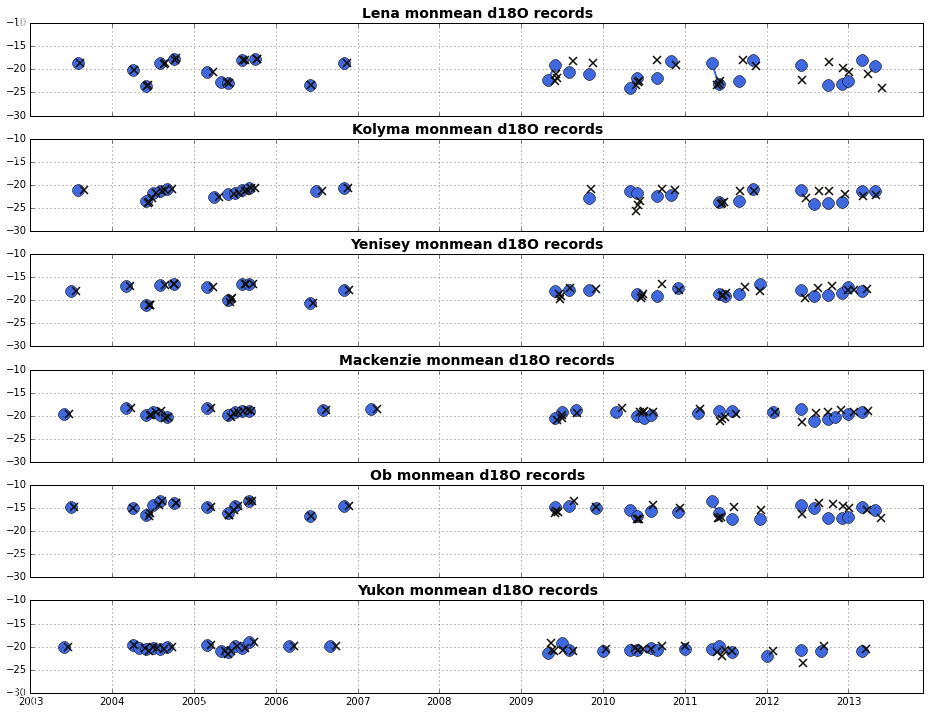

In [18]:
fig, AX = mutifig6()
for i in range(6):
    AX[i].grid()
#
AX[0].plot(Lena_monmean, Lena_d18O_monmean, 'o-', c=RB, ms=12, lw=2)
AX[0].plot(Lena_time, Lena_d18O, 'x', c=SB, ms=8, mew=1.5, lw=2)
AX[0].set_xlim(Lena_monmean[0], Lena_monmean[-1]); AX[0].set_ylim(-30, -10)
AX[0].set_title('Lena monmean d18O records', fontsize=14, fontweight='bold')
AX[0].tick_params(labelbottom='off') 
#
AX[1].plot(Kolyma_monmean, Kolyma_d18O_monmean, 'o-', c=RB, ms=12, lw=2)
AX[1].plot(Kolyma_time, Kolyma_d18O, 'x', c=SB, ms=8, mew=1.5, lw=2)
AX[1].set_xlim(Kolyma_monmean[0], Kolyma_monmean[-1]); AX[1].set_ylim(-30, -10)
AX[1].set_title('Kolyma monmean d18O records', fontsize=14, fontweight='bold')
AX[1].tick_params(labelbottom='off') 
#
AX[2].plot(Yenisey_monmean, Yenisey_d18O_monmean, 'o-', c=RB, ms=12, lw=2)
AX[2].plot(Yenisey_time, Yenisey_d18O, 'x', c=SB, ms=8, mew=1.5, lw=2)
AX[2].set_xlim(Yenisey_monmean[0], Yenisey_monmean[-1]); AX[2].set_ylim(-30, -10)
AX[2].set_title('Yenisey monmean d18O records', fontsize=14, fontweight='bold')
AX[2].tick_params(labelbottom='off') 
#
AX[3].plot(Mackenzie_monmean, Mackenzie_d18O_monmean, 'o-', c=RB, ms=12, lw=2)
AX[3].plot(Mackenzie_time, Mackenzie_d18O, 'x', c=SB, ms=8, mew=1.5, lw=2)
AX[3].set_xlim(Mackenzie_monmean[0], Mackenzie_monmean[-1]); AX[3].set_ylim(-30, -10)
AX[3].set_title('Mackenzie monmean d18O records', fontsize=14, fontweight='bold')
AX[3].tick_params(labelbottom='off') 
#
AX[4].plot(Ob_monmean, Ob_d18O_monmean, 'o-', c=RB, ms=12, lw=2)
AX[4].plot(Ob_time, Ob_d18O, 'x', c=SB, ms=8, mew=1.5, lw=2)
AX[4].set_xlim(Ob_monmean[0], Ob_monmean[-1]); AX[4].set_ylim(-30, -10)
AX[4].set_title('Ob monmean d18O records', fontsize=14, fontweight='bold')
AX[4].tick_params(labelbottom='off') 
#
AX[5].plot(Yukon_monmean, Yukon_d18O_monmean, 'o-', c=RB, ms=12, lw=2)
AX[5].plot(Yukon_time, Yukon_d18O, 'x', c=SB, ms=8, mew=1.5, lw=2)
AX[5].set_xlim(Yukon_monmean[0], Yukon_monmean[-1]); AX[5].set_ylim(-30, -10)
AX[5].set_title('Yukon monmean d18O records', fontsize=14, fontweight='bold')

# Create d18O forcing

In [19]:
Lena_d18O_seasonal     , _ = Nts.bin_season_cycle(Lena_time, Lena_d18O)
Kolyma_d18O_seasonal   , _ = Nts.bin_season_cycle(Kolyma_time, Kolyma_d18O)
Yenisey_d18O_seasonal  , _ = Nts.bin_season_cycle(Yenisey_time, Yenisey_d18O)
Mackenzie_d18O_seasonal, _ = Nts.bin_season_cycle(Mackenzie_time, Mackenzie_d18O)
Ob_d18O_seasonal       , _ = Nts.bin_season_cycle(Ob_time, Ob_d18O)
Yukon_d18O_seasonal    , _ = Nts.bin_season_cycle(Yukon_time, Yukon_d18O)

In [20]:
t = np.arange(1, 13)

## Scaled ensemble result

In [21]:
alld18O = np.empty([6, 12])
alld18O[0, :] = Lena_d18O_seasonal/np.nanmean(Lena_d18O_seasonal)
alld18O[1, :] = Kolyma_d18O_seasonal/np.nanmean(Kolyma_d18O_seasonal)
alld18O[2, :] = Yenisey_d18O_seasonal/np.nanmean(Yenisey_d18O_seasonal)
alld18O[3, :] = Mackenzie_d18O_seasonal/np.nanmean(Mackenzie_d18O_seasonal)
alld18O[4, :] = Ob_d18O_seasonal/np.nanmean(Ob_d18O_seasonal)
alld18O[5, :] = Yukon_d18O_seasonal/np.nanmean(Yukon_d18O_seasonal)

In [22]:
meand18O = np.nanmean(alld18O, 0); 
maxd18O  = np.nanmax(alld18O, 0); 
mind18O  = np.nanmin(alld18O, 0)
errbar   = (maxd18O-mind18O)/2; 
errbar[mind18O==maxd18O]=np.nan

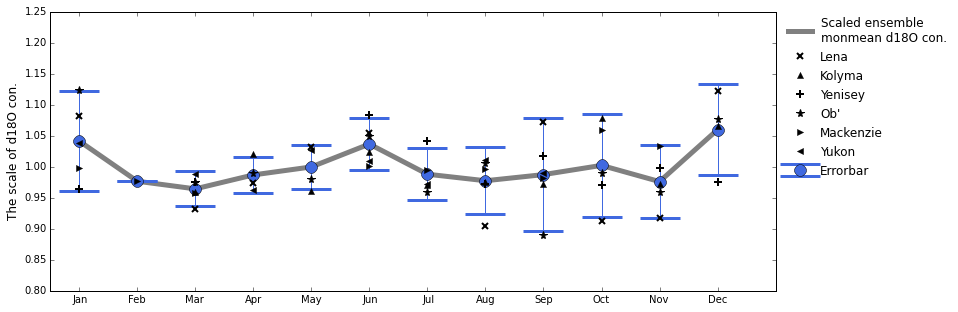

In [24]:
fig = plt.figure(figsize=(13, 5))
ax = fig.gca()
ax.plot(t, meand18O, '-', color='gray', linewidth=5, label='Scaled ensemble\nmonmean d18O con.')
ax.errorbar(t, meand18O, yerr=(maxd18O-mind18O)/2, fmt='o', ms=12, mfc=RB, ecolor=RB, capthick=3, capsize=20, label='Errorbar');
ax.plot(t, alld18O[0, :].T, 'x', ms=6, mew=2, color='k', label = 'Lena');
ax.plot(t, alld18O[1, :].T, '^', ms=6, mew=0.5, color='k', label = 'Kolyma');
ax.plot(t, alld18O[2, :].T, '+', ms=8, mew=2, color='k', label = 'Yenisey');
ax.plot(t, alld18O[4, :].T, '*', ms=8, mew=1, color='k', label = "Ob'");
ax.plot(t, alld18O[3, :].T, '>', ms=6, mew=0.5, color='k', label = 'Mackenzie');
ax.plot(t, alld18O[5, :].T, '<', ms=6, mew=0.5, color='k', label = 'Yukon');
LG = ax.legend(numpoints=1, bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.); LG.draw_frame(False)  
ax.set_ylabel('The scale of d18O con.', fontsize=12)
ax.set_xlim(0.5, 13); ax.set_ylim(0.8, 1.25)
ax.set_xticks(range(1, 13)); ax.set_xticklabels(Mon);

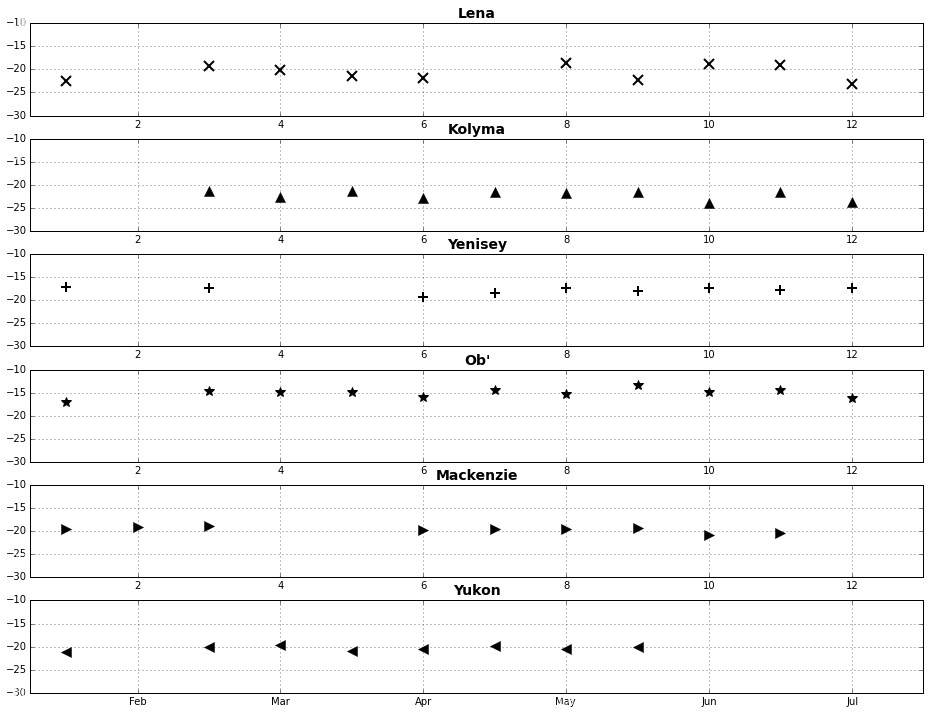

In [26]:
fig = plt.figure(figsize=(13, 5))
fig, AX = mutifig6()
for i in range(6):
    AX[i].grid()
    AX[i].set_xlim(0.5, 13); AX[i].set_ylim(-30, -10)
#
AX[0].plot(t, Lena_d18O_seasonal, 'x', ms=10, mew=2, color='k', label = 'Lena')
AX[0].set_title('Lena', fontsize=14, fontweight='bold')
AX[1].plot(t, Kolyma_d18O_seasonal, '^', ms=10, mew=0.5, color='k', label = 'Kolyma');
AX[1].set_title('Kolyma', fontsize=14, fontweight='bold')
AX[2].plot(t, Yenisey_d18O_seasonal, '+', ms=10, mew=2, color='k', label = 'Yenisey');
AX[2].set_title('Yenisey', fontsize=14, fontweight='bold')
AX[3].plot(t, Ob_d18O_seasonal, '*', ms=10, mew=1, color='k', label = "Ob'");
AX[3].set_title("Ob'", fontsize=14, fontweight='bold')
AX[4].plot(t, Mackenzie_d18O_seasonal, '>', ms=10, mew=0.5, color='k', label = 'Mackenzie');
AX[4].set_title('Mackenzie', fontsize=14, fontweight='bold')
AX[5].plot(t, Yukon_d18O_seasonal, '<', ms=10, mew=0.5, color='k', label = 'Yukon');
AX[5].set_title('Yukon', fontsize=14, fontweight='bold')
#LG = AX[6].legend(numpoints=1, bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.); LG.draw_frame(False) 
AX[5].set_xticklabels(Mon);

**Yamamoto-Kawai (2005)**

<img src="_figures/d18O_Yamamoto.PNG" width=650 align="left"/>